#To check whether all the features we selected are related to our model I am using exploratory data analysis (EDA) to select the most important features.

> Since bank's performance based on loan, deposit and current accounts balance I am taking each to compare with our features.



1. Let's take feature - populaton as an example to show what could be good indicator of a feature that is correlated with our target.

In [7]:
import pandas as pd
merged_df = pd.read_excel("/content/merged_df.xlsx")

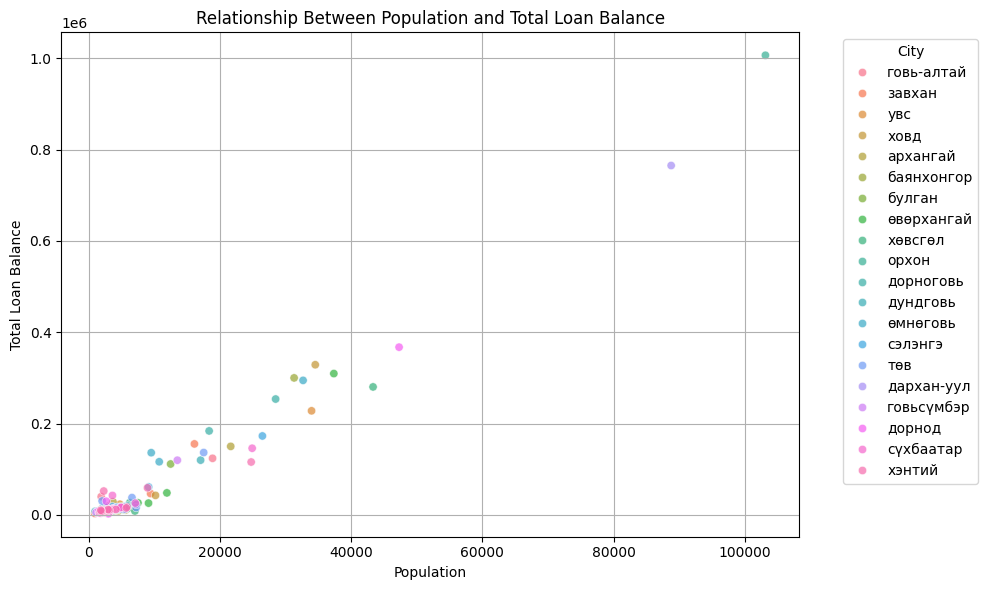

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df = merged_df.copy()
df = df[(df['Population'] > 0) & (df['Total_loan_balance'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='Total_loan_balance', hue='City', alpha=0.7)

plt.title('Relationship Between Population and Total Loan Balance')
plt.xlabel('Population')
plt.ylabel('Total Loan Balance')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

*Here we can see that there are outliers and lot of cities' datas are overlaying on top of each other. In this case, we should use log-transformation to reduce skewness and compress extreme values!*

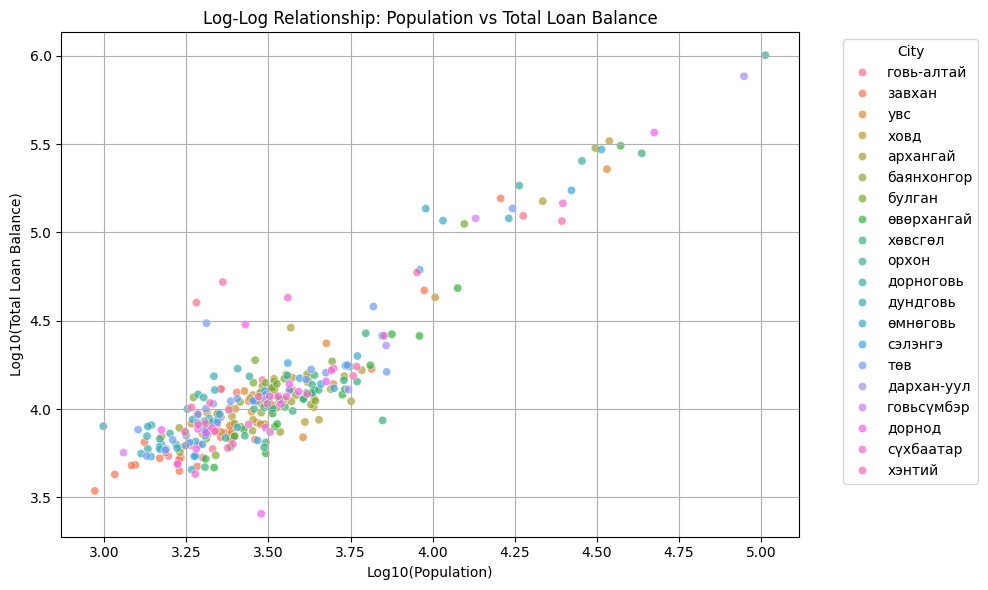

In [12]:
import numpy as np

df = merged_df.copy()
df = df[(df['Population'] > 0) & (df['Total_loan_balance'] > 0)]

df['log_Population'] = np.log10(df['Population'])
df['log_Loan'] = np.log10(df['Total_loan_balance'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_Population', y='log_Loan', hue='City', alpha=0.7)

plt.title('Log-Log Relationship: Population vs Total Loan Balance')
plt.xlabel('Log10(Population)')
plt.ylabel('Log10(Total Loan Balance)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


*Now, we can see much better visualization. As we can see there is a clear linear relationship between population and total loan balances which also aligns with the real world expectation.*

2. Now let's analyze all the features we have in columns merged_df to see which ones have correlation and which ones are randomly distributed. I added regression line to make correlation visually facilitating.

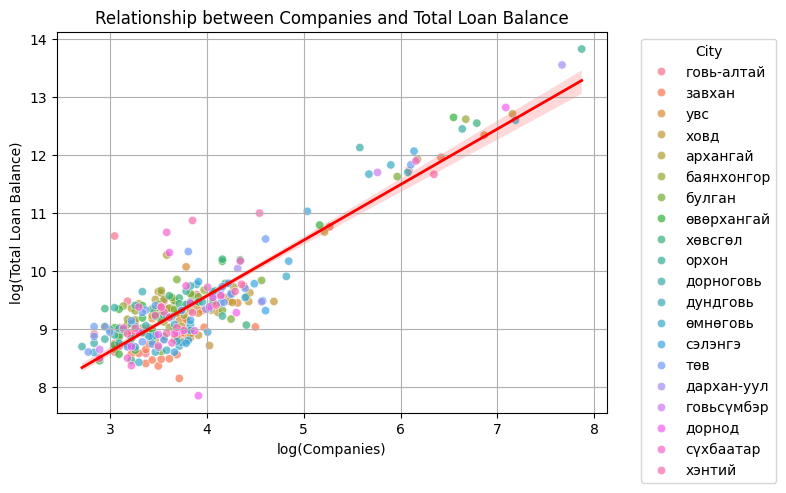

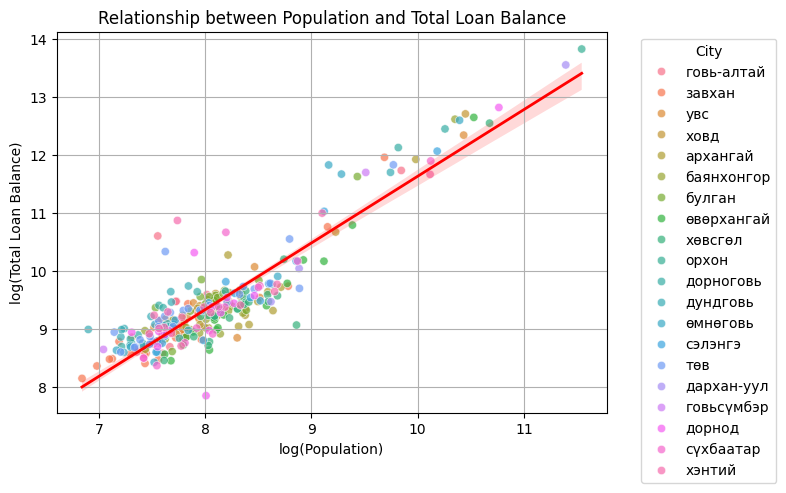

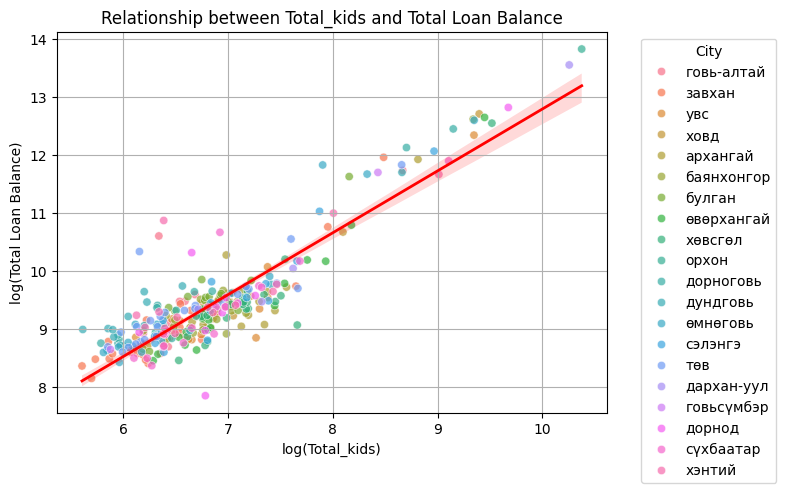

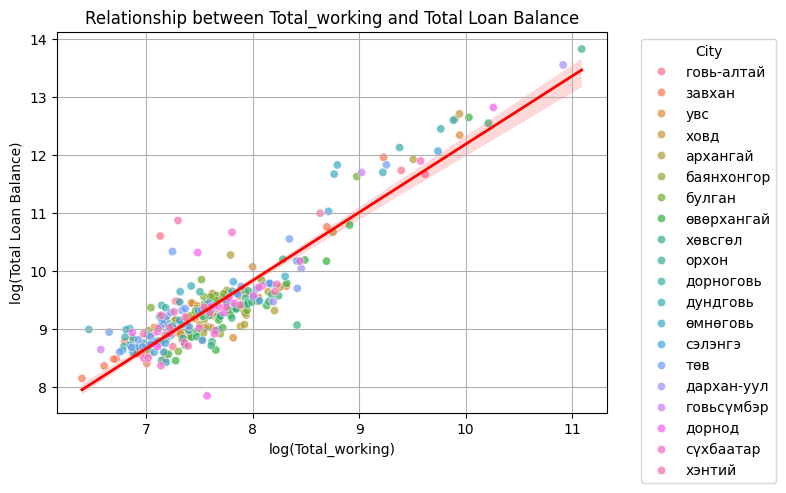

/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


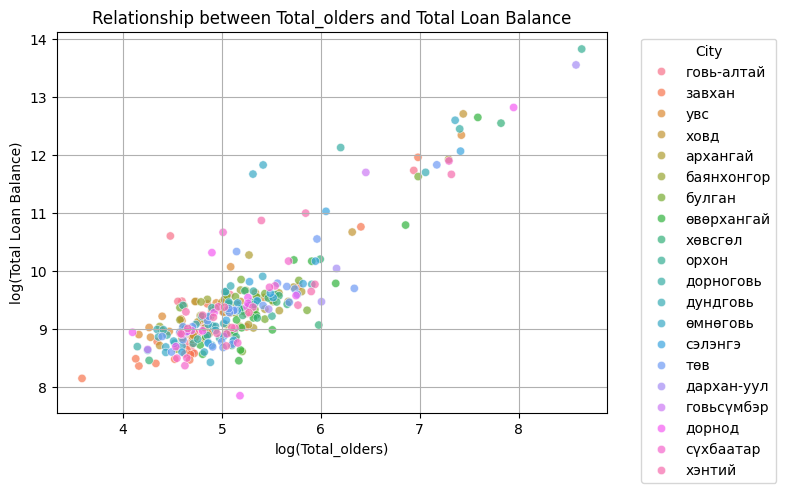

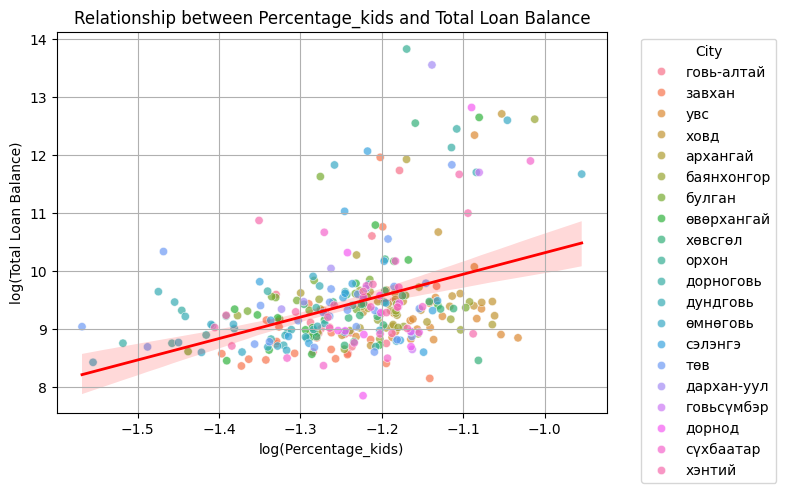

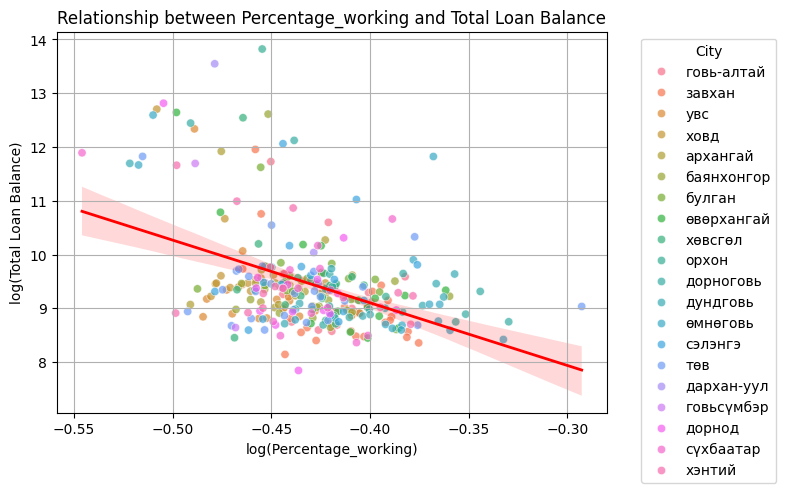

/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


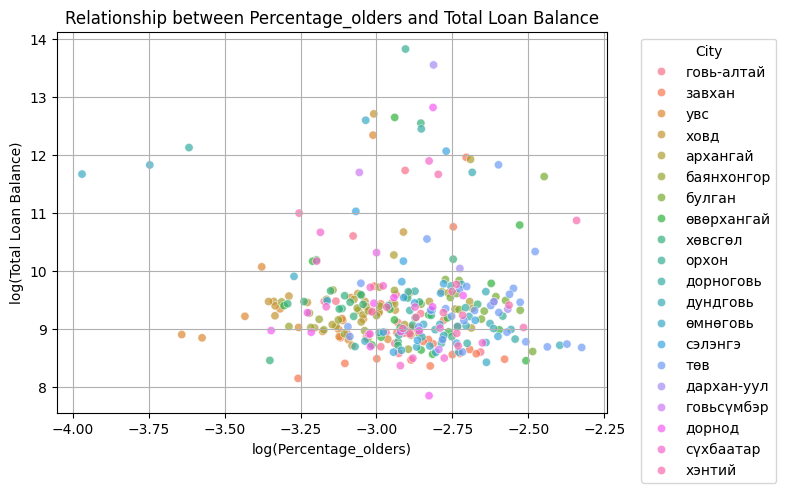

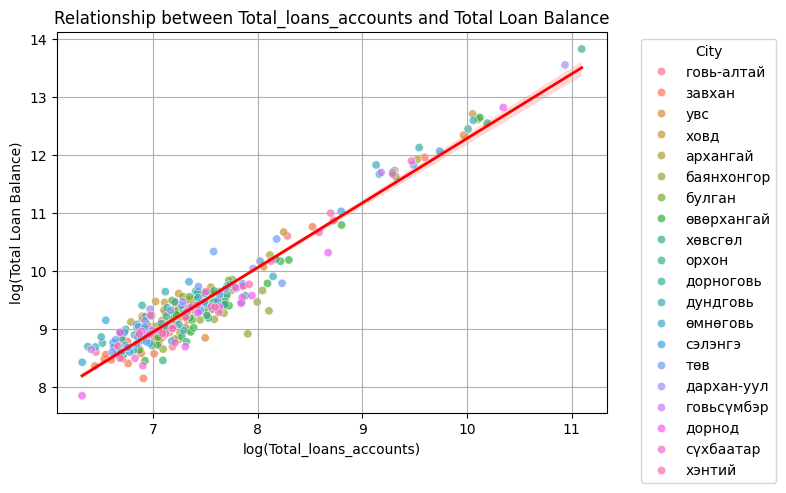

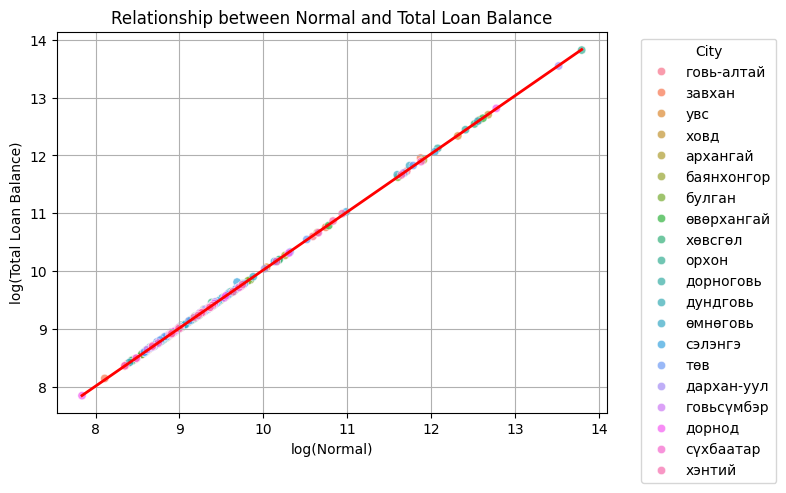

/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


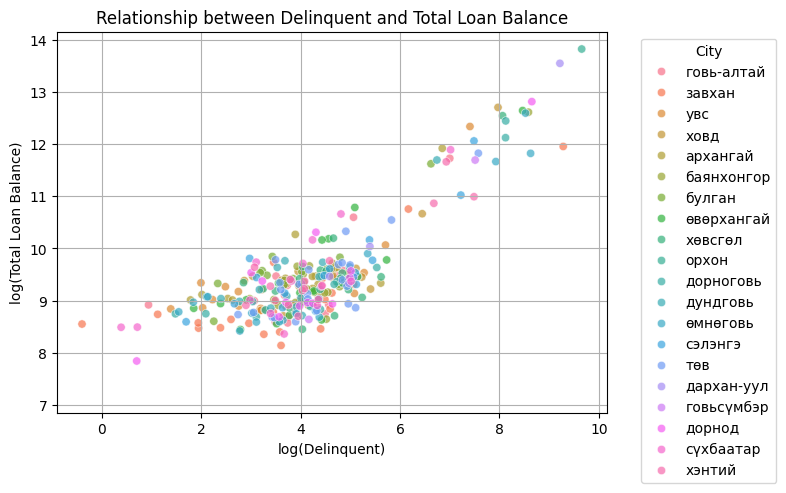

/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


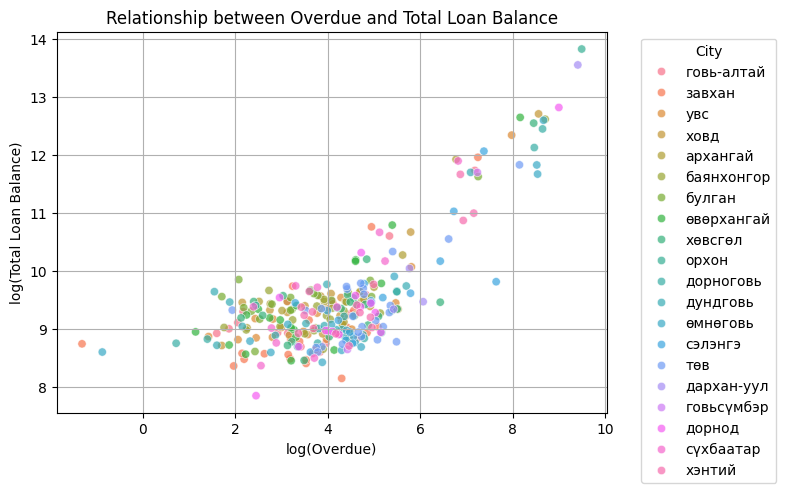

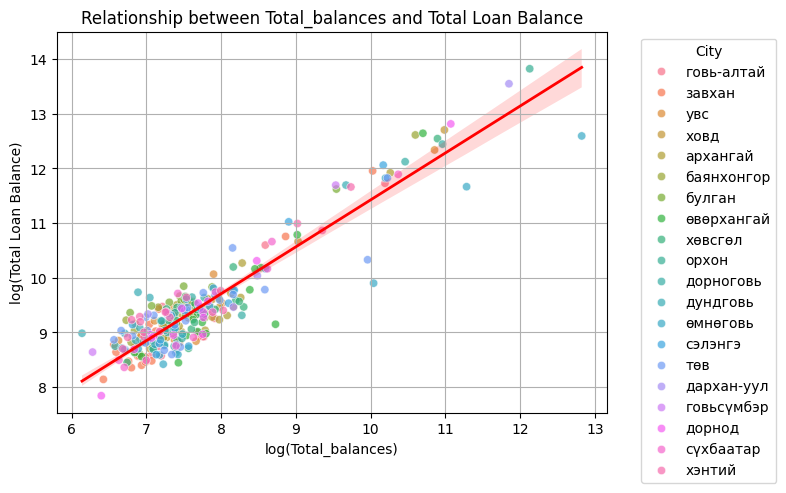

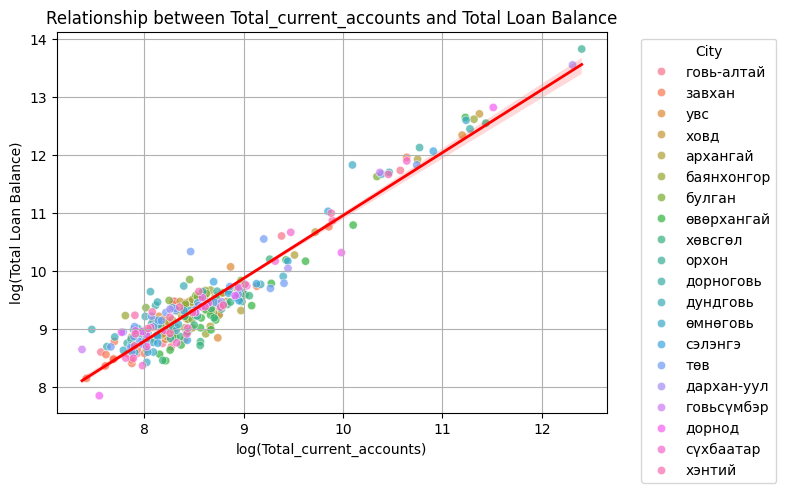

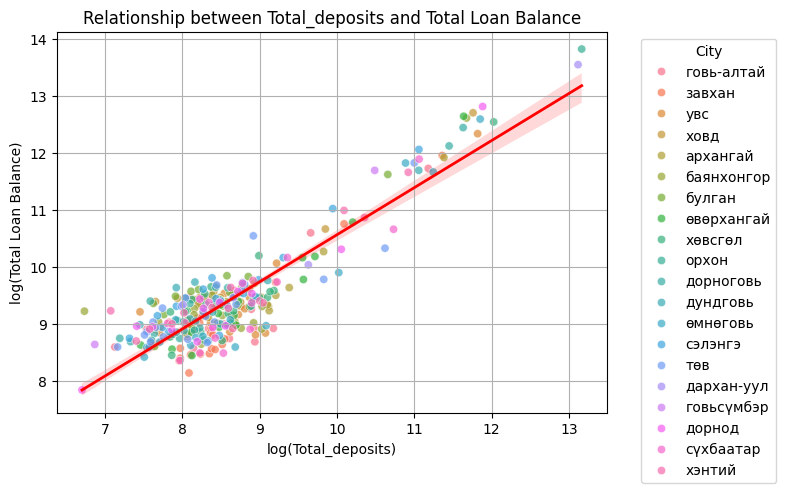

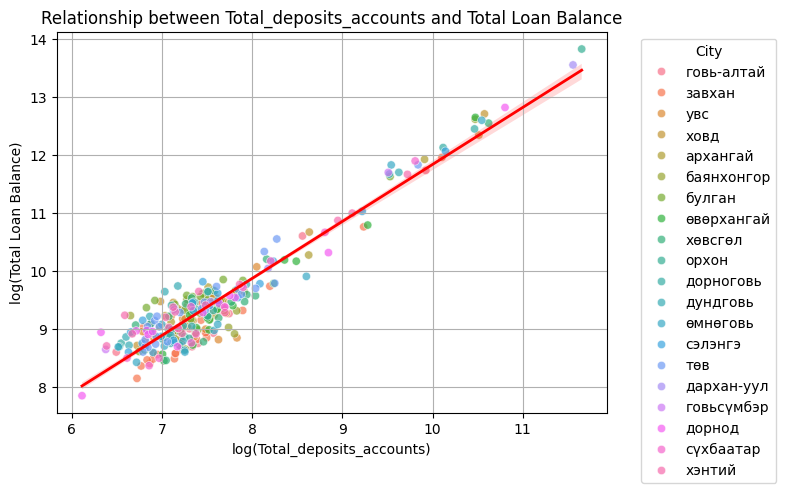

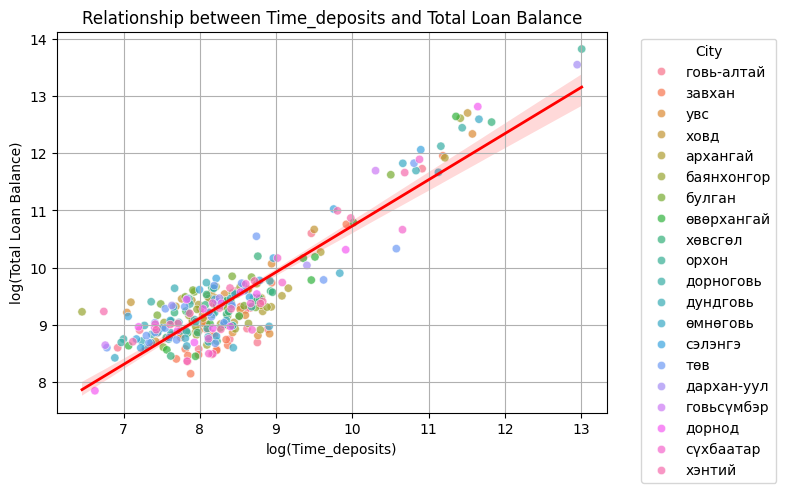

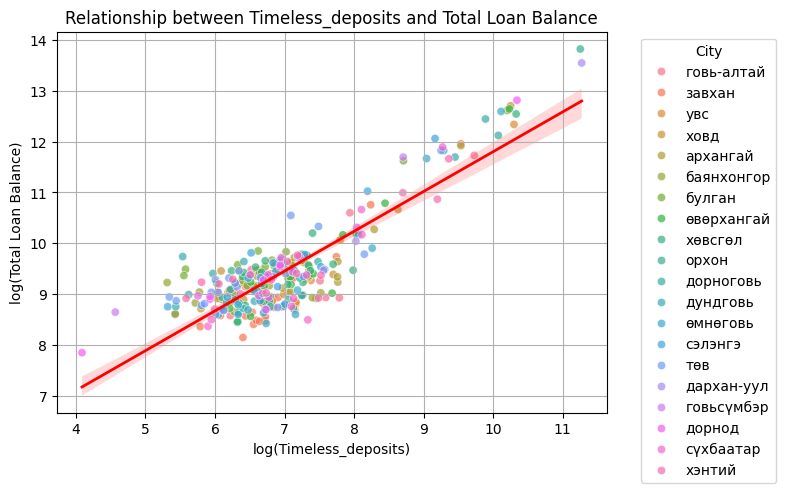

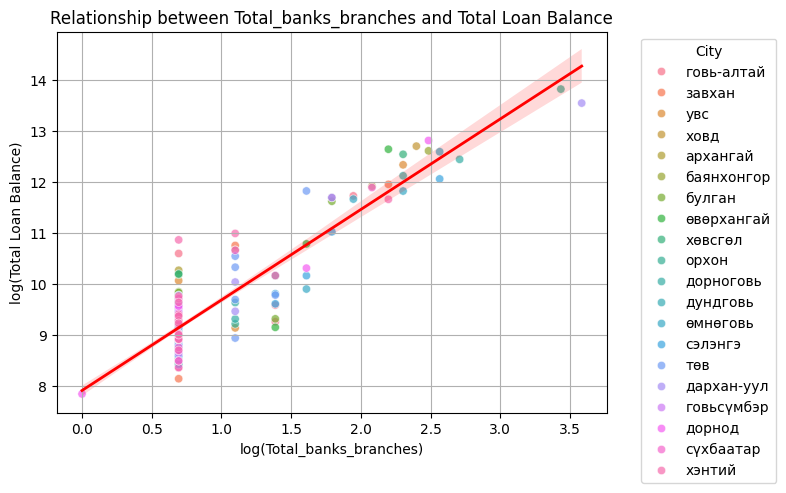

/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


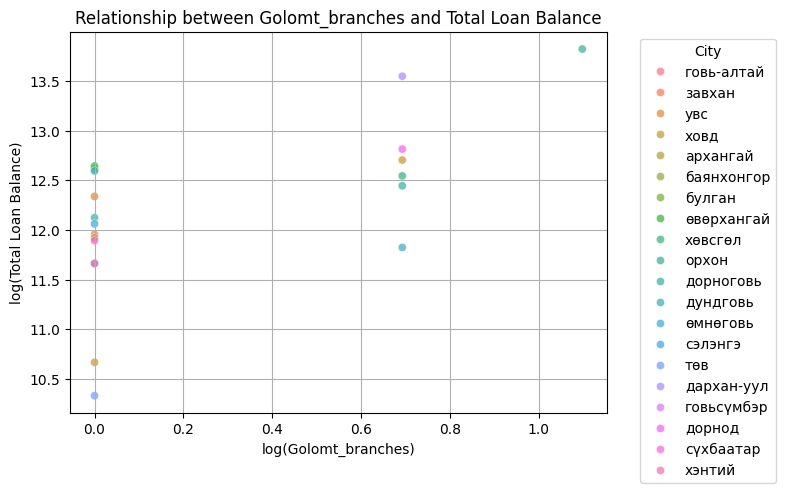

In [13]:
df = merged_df.copy()
df = df[(df['Population'] > 0) & (df['Total_loan_balance'] > 0)]

numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Total_loan_balance']

df_log = df.copy()
df_log[numeric_cols] = df_log[numeric_cols].apply(np.log)
df_log['Total_loan_balance'] = np.log(df_log['Total_loan_balance'])

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_log, x=col, y='Total_loan_balance', hue='City', alpha=0.7)
    sns.regplot(data=df_log, x=col, y='Total_loan_balance', scatter=False, color='red', line_kws={'linewidth': 2})


    plt.title(f'Relationship between {col} and Total Loan Balance')
    plt.xlabel(f'log({col})')
    plt.ylabel('log(Total Loan Balance)')
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

* Features that are highly correlated with loan balance - Number of companies, population (ofc kids, working, and olders population is intercorrelated with population so it makes sence they also have linear relation), as expected other accounts and their balances (deposit and current) has LR too, total branch numbers
* Features that are not correlated with loan balance - Percentage working, kids, olders

As we can see, even though some of the features relationship may seem obvious we always need to double check!!